In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn

In [2]:
from IPython.display import Audio

In [3]:
Audio('beep-04.mp3', autoplay=True)

We already have our data split into train, validation and test sets, and it has already been preprocessed. Let's load them in


In [4]:
X_train = pd.read_csv('Modeling_Datasets/X_train_processed.csv')
X_val = pd.read_csv('Modeling_Datasets/X_val_processed.csv')
X_test = pd.read_csv('Modeling_Datasets/X_test_processed.csv')

In [5]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(17820, 457)
(7638, 457)
(10911, 457)


In [6]:
y_train = pd.read_csv('Modeling_Datasets/y_train.csv')
y_val = pd.read_csv('Modeling_Datasets/y_val.csv')
y_test = pd.read_csv('Modeling_Datasets/y_test.csv')

In [7]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(17820, 1)
(7638, 1)
(10911, 1)


In [8]:
y_train.value_counts()

review_scores_rating
5                       13892
4                        3379
3                         305
1                         132
2                         110
0                           2
dtype: int64

In [9]:
y_val.value_counts()

review_scores_rating
5                       5954
4                       1448
3                        131
1                         57
2                         47
0                          1
dtype: int64

In [10]:
y_test.value_counts()

review_scores_rating
5                       8506
4                       2069
3                        187
1                         81
2                         67
0                          1
dtype: int64

Our target sets are not quite in the right shape for Machine Learning applications. We will use `ravel()` to correct this:

In [11]:
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

In [12]:
print(f'New y_train shape: {y_train.shape}')
print(f'New y_val shape: {y_val.shape}')
print(f'New y_test shape: {y_test.shape}')

New y_train shape: (17820,)
New y_val shape: (7638,)
New y_test shape: (10911,)


Great, now our target sets are in the correct shape.

## Using SMOTE to upsample the data

-------

From the `value_counts()` above, we have a large class imbalance on our data. This will skew the data towards a certain outcome. Here we will upsample the datasets so that the class imbalances are eliminated and also use these datasets for our models and will compare their performances.

In [13]:
imblearn.__version__

'0.9.1'

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
sampler = SMOTE(random_state=3, k_neighbors=1)
X_train_sm, y_train_sm = sampler.fit_resample(X_train, y_train)

In [16]:
X_train_sm.shape

(83352, 457)

In [17]:
y_train_sm.shape

(83352,)

We can check the value counts of `y_train_sm` by converting it to a series:

In [18]:
pd.Series(y_train_sm).value_counts()

4    13892
5    13892
2    13892
3    13892
1    13892
0    13892
dtype: int64

Great, that has worked to balance our classes, note we do not want to sample our validation or test sets as this will skew our model results.

------

Let's start with a basic Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [22]:
train_accs = []
val_accs = []

for depth in range(1, 15):
    
    #instantiate
    dt_model = DecisionTreeClassifier(max_depth = depth)
    
    # fit
    dt_model.fit(X_train, y_train)
    
    # score on train and validation sets
    train_score = dt_model.score(X_train, y_train)
    val_score = dt_model.score(X_val, y_val)
    
    #Append to lists
    train_accs.append(train_score)
    val_accs.append(val_score)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/

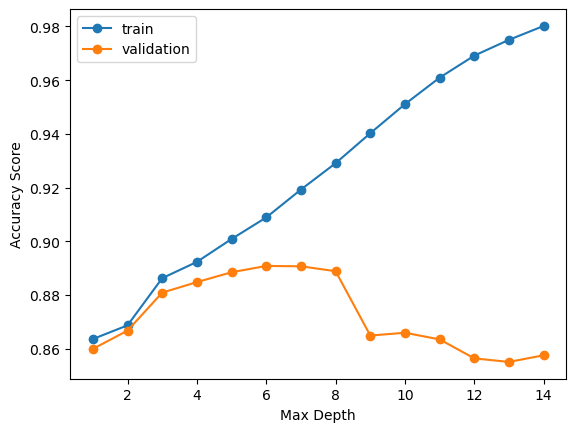

In [23]:
# Plotting the results
plt.figure()
plt.plot(range(1, 15), train_accs, label='train', marker='o')
plt.plot(range(1, 15), val_accs, label='validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [24]:
max_depth = np.argmax(val_accs)
max_depth

5

In [25]:
train_accs[max_depth]

0.9088664421997755

In [26]:
val_accs[max_depth]

0.8908091123330715

Now let's see how this model does with a `max_depth` of $5$ on the testing data:

In [27]:
final_dt_model = DecisionTreeClassifier(max_depth = 5)

final_dt_model.fit(X_train, y_train)

training_score = final_dt_model.score(X_train, y_train)
testing_score = final_dt_model.score(X_test, y_test)

print(f'Training Score: {round(training_score, 3)}')
print(f'Testing Score: {round(testing_score, 3)}')

Training Score: 0.901
Testing Score: 0.898


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [28]:
y_pred = final_dt_model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.8938581649919675

Not bad! On our first model we got an accuracy score of ~90% on the testing set, let's see what the baseline is for the testing set.

In [29]:
pd.Series(y_test).value_counts().sort_index()

0       1
1      81
2      67
3     187
4    2069
5    8506
dtype: int64

In [30]:
round((8506 / y_test.shape[0] * 100), 3)

77.958

In [31]:
0.898 * 100 - 77.958

11.841999999999999

So our model performed almost 12% better than assuming every host's review score would be a 5. Let's see what the most important features were for this prediction:

In [32]:
from sklearn.tree import plot_tree

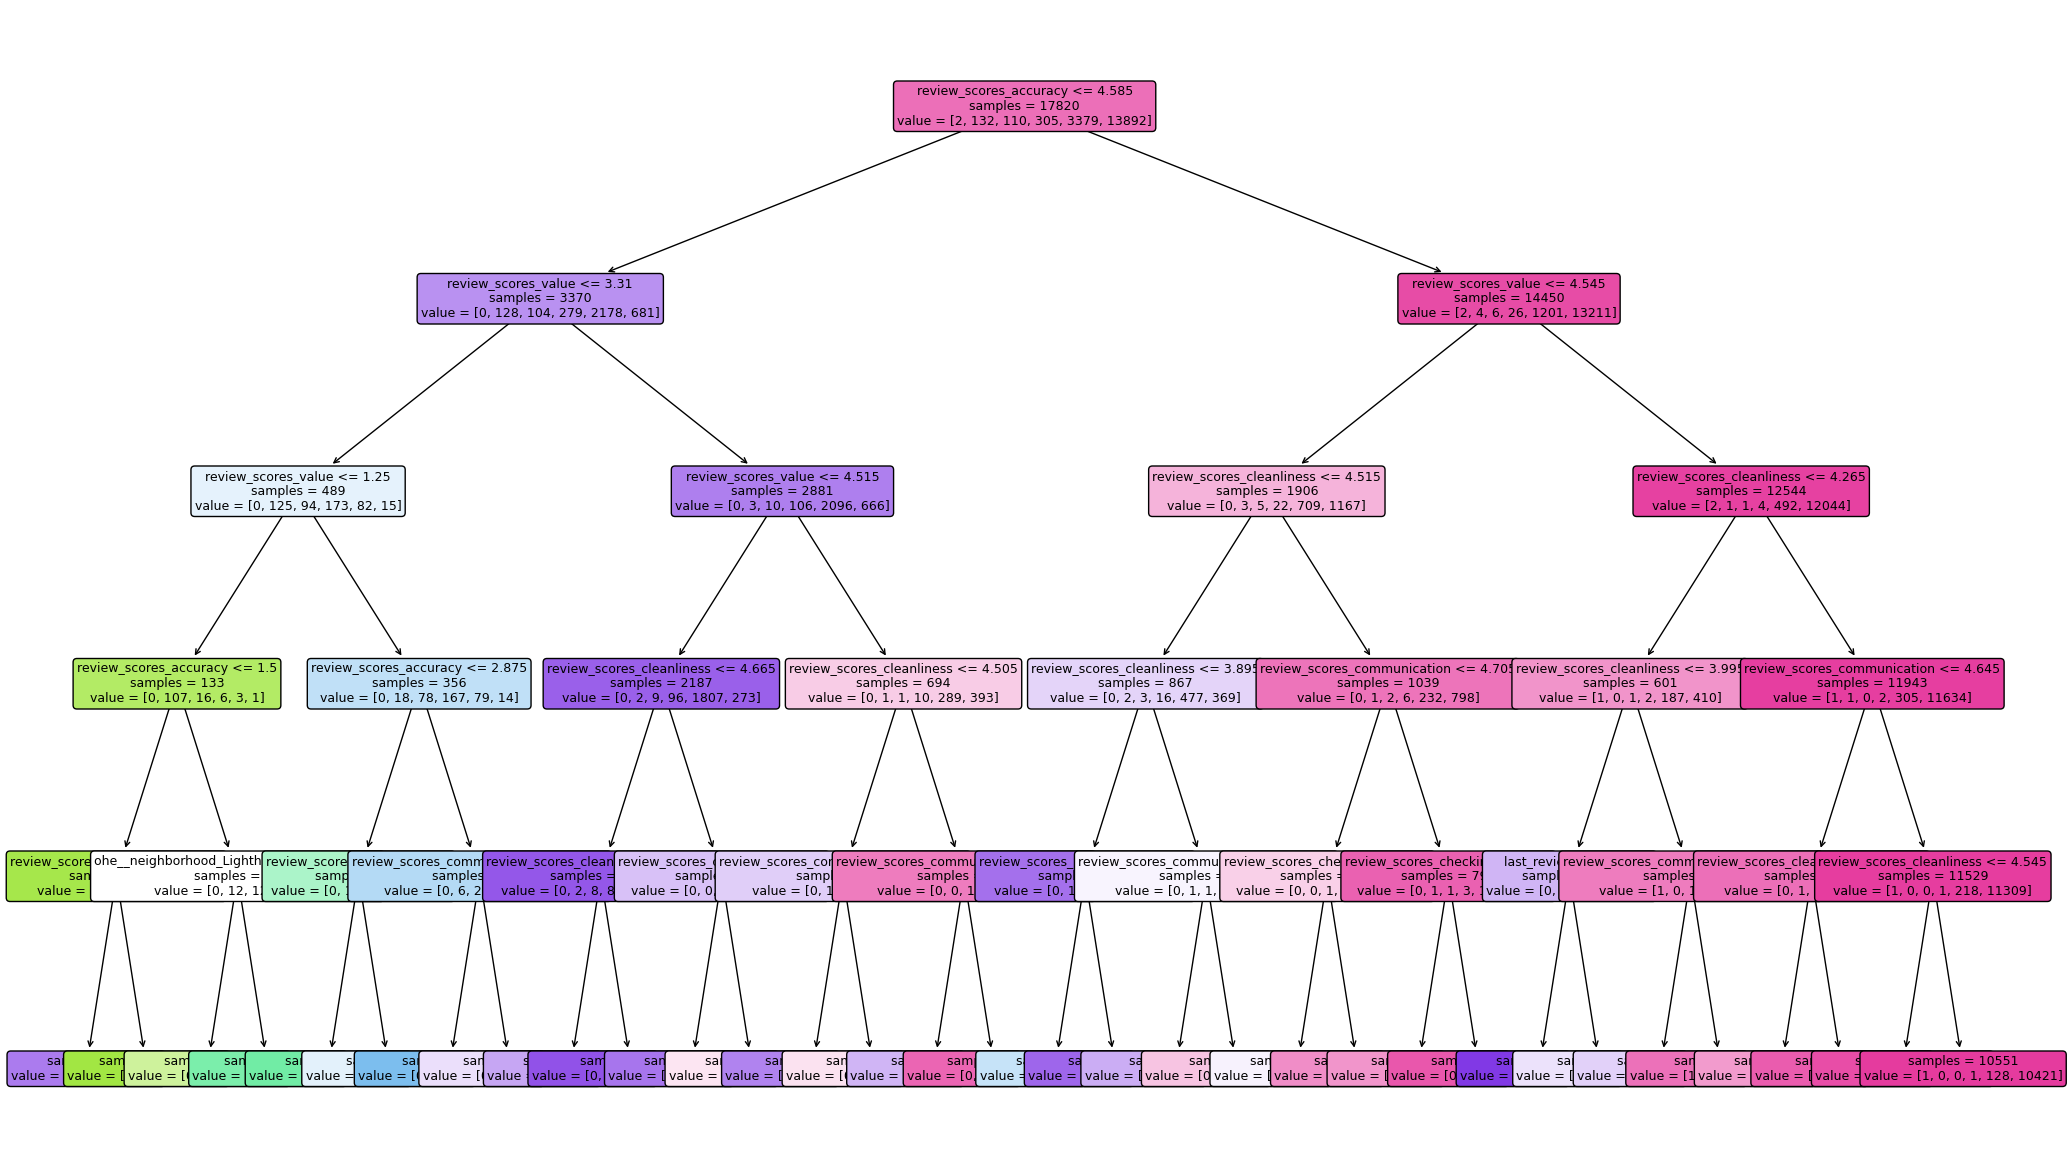

In [33]:
fig, ax = plt.subplots(figsize=(25, 15))

plot_tree(final_dt_model,
         feature_names=X_test.columns,
         rounded=True,
         impurity=False,
         filled=True,
         ax=ax,
         fontsize=9);

It looks like the classifier is using other host review metrics to predict their overall host score. While this makes sense, we do not want this in our final model as it will not help a new host guess their score.

## Getting rid of other review predictors

In [34]:
cols_to_remove = ['review_scores_accuracy', 'review_scores_cleanliness',
 'review_scores_checkin', 'review_scores_communication',
 'review_scores_location', 'review_scores_value']

dataframes = [X_train, X_val, X_test, X_train_sm]

for df in dataframes:
    df.drop(columns=cols_to_remove, inplace=True)
    
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(17820, 451)
(7638, 451)
(10911, 451)


Now we can re-run the decision tree model and again check the accuracy.

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
train_accs = []
val_accs = []

for depth in range(1, 15):
    
    #instantiate
    dt_model = DecisionTreeClassifier(max_depth = depth)
    
    # fit
    dt_model.fit(X_train, y_train)
    
    # score on train and validation sets
    train_score = dt_model.score(X_train, y_train)
    val_score = dt_model.score(X_val, y_val)
    
    #Append to lists
    train_accs.append(train_score)
    val_accs.append(val_score)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/

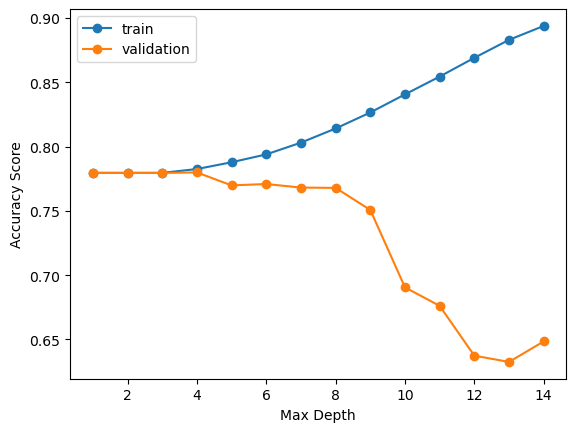

In [37]:
# Plotting the results
plt.figure()
plt.plot(range(1, 15), train_accs, label='train', marker='o')
plt.plot(range(1, 15), val_accs, label='validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [38]:
max_depth = np.argmax(val_accs)
max_depth

3

In [39]:
train_accs[max_depth]

0.7825476992143658

In [40]:
val_accs[max_depth]

0.7799162084315265

Now let's see how this model does with a `max_depth` of $3$ on the testing data:

In [41]:
final_dt_model = DecisionTreeClassifier(max_depth = 3)

final_dt_model.fit(X_train, y_train)

training_score = final_dt_model.score(X_train, y_train)
testing_score = final_dt_model.score(X_test, y_test)

print(f'Training Score: {round(training_score, 5)}')
print(f'Testing Score: {round(testing_score, 5)}')

Training Score: 0.77957
Testing Score: 0.77958


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [42]:
y_pred = final_dt_model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.6830210148323871

In [43]:
round((8506 / y_test.shape[0] * 100), 3)

77.958

In [44]:
0.77958 * 100 - 77.958

0.0

There it is, our model is no better than the baseline! Let's look at the tree again to see why this is:

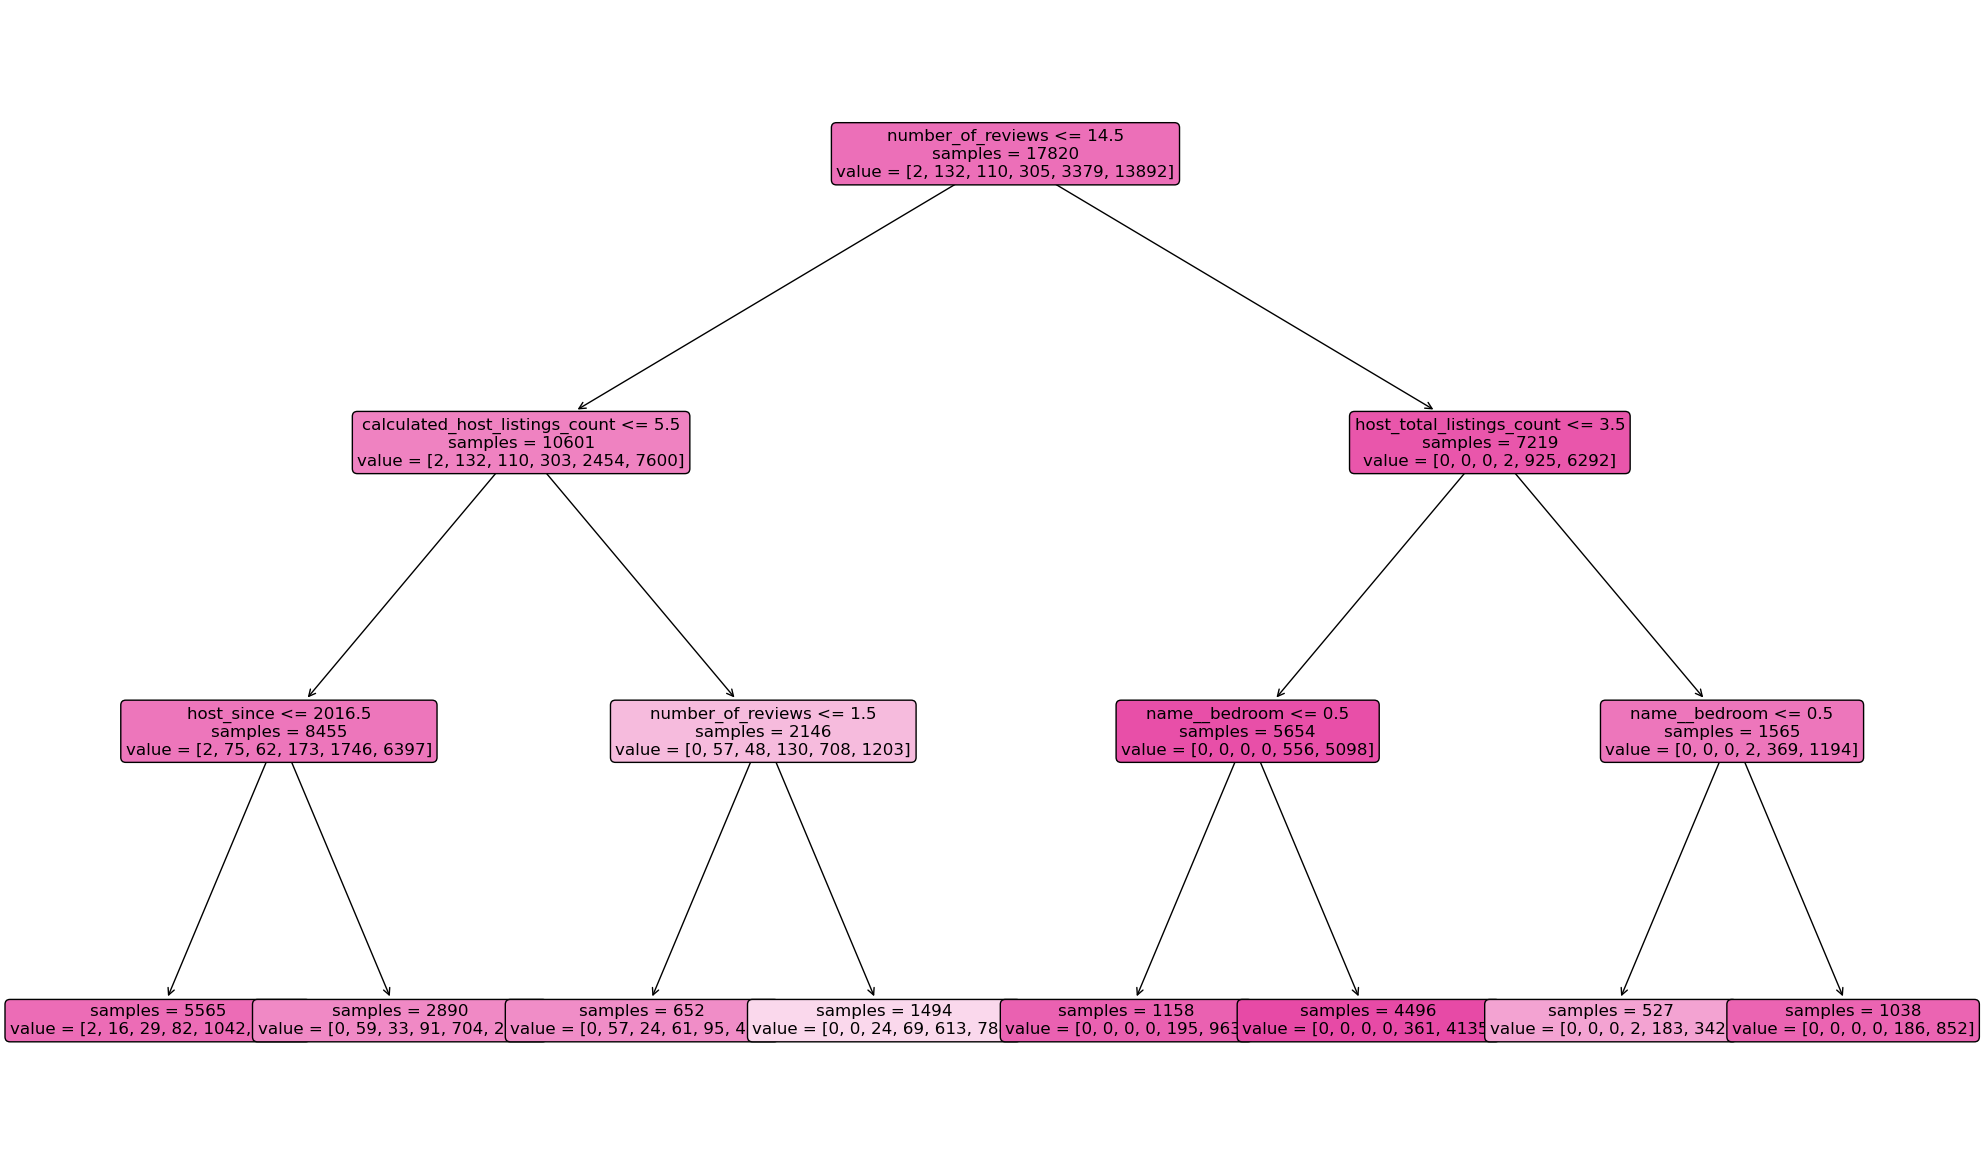

In [45]:
fig, ax = plt.subplots(figsize=(25, 15))

plot_tree(final_dt_model,
         feature_names=X_test.columns,
         rounded=True,
         impurity=False,
         filled=True,
         ax=ax,
         fontsize=12);

These predictors make sense as well, but our model did not perform well. Let's try this model with the upsampled data:

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
train_accs = []
val_accs = []

for depth in range(1, 15):
    
    #instantiate
    dt_model = DecisionTreeClassifier(max_depth = depth)
    
    # fit
    dt_model.fit(X_train_sm, y_train_sm)
    
    # score on train and validation sets
    train_score = dt_model.score(X_train_sm, y_train_sm)
    val_score = dt_model.score(X_val, y_val)
    
    #Append to lists
    train_accs.append(train_score)
    val_accs.append(val_score)

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/

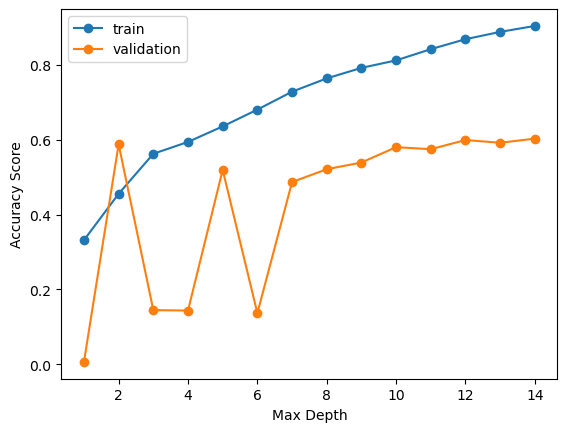

In [48]:
# Plotting the results
plt.figure()
plt.plot(range(1, 15), train_accs, label='train', marker='o')
plt.plot(range(1, 15), val_accs, label='validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

It looks like the closest point that our validation is to our training set is at a max_depth of around 5. Let's see how that depth does on the testing set:

In [49]:
max_depth = 5
max_depth

5

Now let's see how this model does with a `max_depth` of $5$ on the testing data:

In [50]:
final_dt_model = DecisionTreeClassifier(max_depth = 5)

final_dt_model.fit(X_train_sm, y_train_sm)

training_score = final_dt_model.score(X_train_sm, y_train_sm)
testing_score = final_dt_model.score(X_test, y_test)

print(f'Training Score: {round(training_score, 5)}')
print(f'Testing Score: {round(testing_score, 5)}')

Training Score: 0.6357
Testing Score: 0.46861


/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [51]:
y_pred = final_dt_model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

/Users/williamsanzone/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.552048736619312

Ok.... the upsampled dataset performed really poorly, AND our F1 score went down. Let's go to another model type all together.

## Random Forest Model:

In [52]:
import warnings
warnings.filterwarnings("ignore")

We will start by tuning the `n_estimators` parameter for our random forest classifier.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
n_estimators_range = range(1, 51)
results = pd.DataFrame()
for estimator in n_estimators_range:
    rf = RandomForestClassifier(n_estimators = estimator)
    
    rf.fit(X_train, y_train)
    
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    
    results = results.append(
    {'n_estimators': estimator, 'train': train_score, 'validation': val_score}, ignore_index=True)
    
    print(estimator, end='\r')


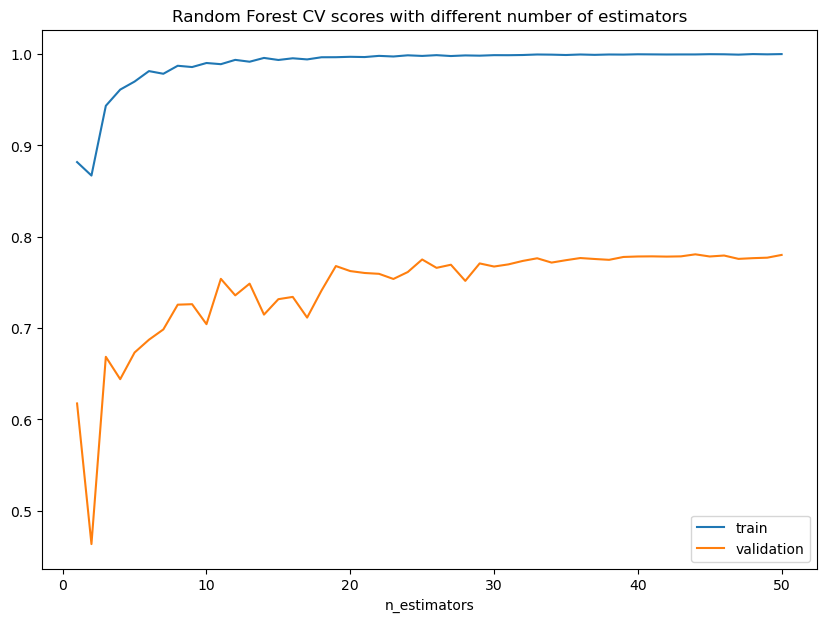

In [55]:
plt.figure(figsize=(10, 7))
results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different number of estimators")
plt.show()

Our model appears to be overfitting to the training data no matter what number of estimators we use. Let's settle on a value of 20 and try tuning another hyperparameter:

In [56]:
max_depths = range(1, 31)
results = pd.DataFrame()
for depth in max_depths:
    rf = RandomForestClassifier(n_estimators = 20, max_depth=depth)
    
    rf.fit(X_train, y_train)
    
    train_score = rf.score(X_train, y_train)
    val_score = rf.score(X_val, y_val)
    
    results = results.append(
    {'max_depth': depth, 'train': train_score, 'validation': val_score}, ignore_index=True)
    
    print(depth, end='\r')


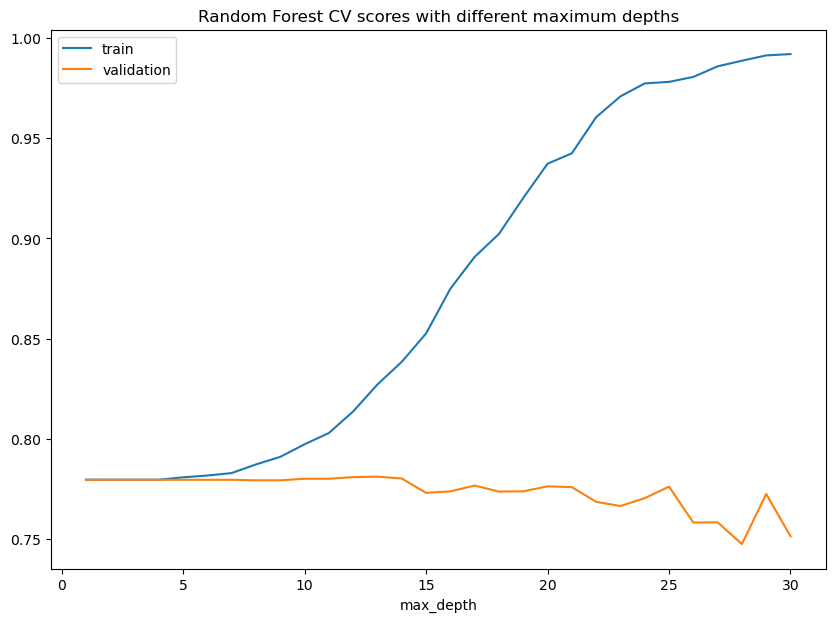

In [57]:
plt.figure(figsize=(10, 7))
results.plot(x="max_depth", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different maximum depths")
plt.show()

From this graph, it looks like a `max_depth` of around 5 will give us the best results. Let's see how this model does on the testing data:

In [58]:
final_rf = RandomForestClassifier(max_depth=5, n_estimators=20)

final_rf.fit(X_train, y_train)

train_score = final_rf.score(X_train, y_train)
test_score = final_rf.score(X_test, y_test)

In [59]:
print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 0.7799102132435466
Testing Score: 0.7795802401246449


In [60]:
y_pred = final_rf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6830210148323871

Interesting, our Random Forest model had similar performance to our best decision tree model when you compare F1 scores. We will keep that in mind for the future.

## Repeating Random Forest Model with Upsampled Data

We will start by tuning the `n_estimators` parameter for our random forest classifier.

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
n_estimators_range = range(1, 31)
results = pd.DataFrame()
for estimator in n_estimators_range:
    rf = RandomForestClassifier(n_estimators = estimator)
    
    rf.fit(X_train_sm, y_train_sm)
    
    train_score = rf.score(X_train_sm, y_train_sm)
    val_score = rf.score(X_val, y_val)
    
    results = results.append(
    {'n_estimators': estimator, 'train': train_score, 'validation': val_score}, ignore_index=True)
    
    print(estimator, end='\r')


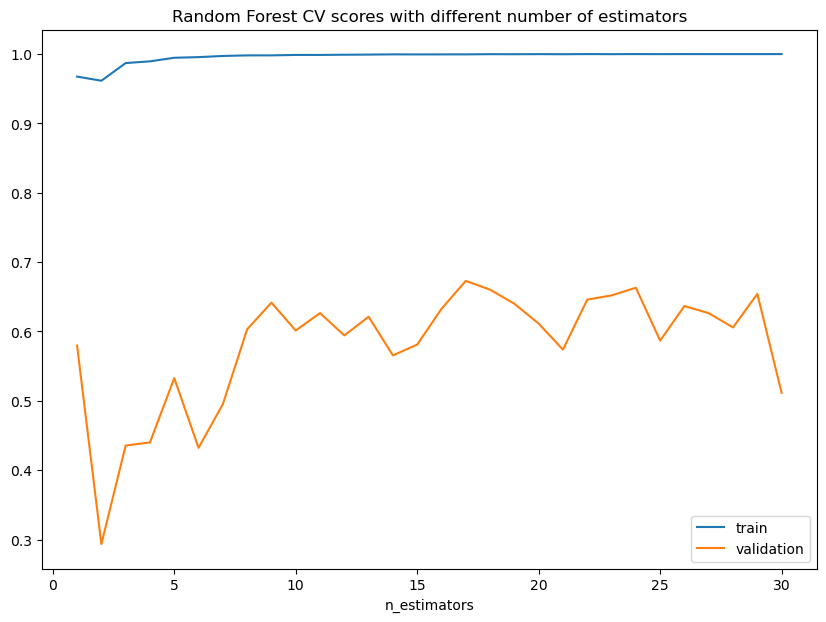

In [63]:
plt.figure(figsize=(10, 7))
results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different number of estimators")
plt.show()

In [64]:
results

,n_estimators,train,validation
0,1.0,0.967463,0.579602
1,2.0,0.961513,0.293401
2,3.0,0.986995,0.435454
3,4.0,0.989466,0.440037
4,5.0,0.994637,0.532731
5,6.0,0.995561,0.432181
6,7.0,0.997229,0.495156
7,8.0,0.998044,0.603037
8,9.0,0.998080,0.641529
9,10.0,0.998728,0.601335


A `n_estimators` of 9 returned the best results. Let's try tuning `max_depth` with this value.

In [65]:
max_depths = range(1, 31)
results = pd.DataFrame()
for depth in max_depths:
    rf = RandomForestClassifier(n_estimators = 9, max_depth=depth)
    
    rf.fit(X_train_sm, y_train_sm)
    
    train_score = rf.score(X_train_sm, y_train_sm)
    val_score = rf.score(X_val, y_val)
    
    results = results.append(
    {'max_depth': depth, 'train': train_score, 'validation': val_score}, ignore_index=True)
    
    print(depth, end='\r')


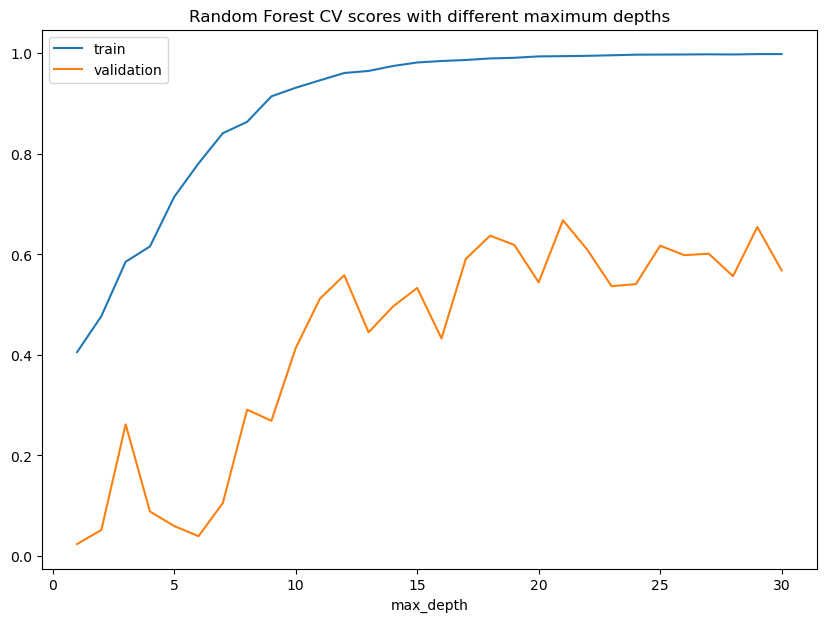

In [66]:
plt.figure(figsize=(10, 7))
results.plot(x="max_depth", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different maximum depths")
plt.show()

In [67]:
results

,max_depth,train,validation
0,1.0,0.405341,0.023566
1,2.0,0.476869,0.051715
2,3.0,0.585061,0.261587
3,4.0,0.615486,0.088374
4,5.0,0.714188,0.059440
5,6.0,0.780653,0.039277
6,7.0,0.840736,0.105263
7,8.0,0.863351,0.290914
8,9.0,0.914063,0.268788
9,10.0,0.931147,0.413459


A `max_depth` of 23 returns the best validation accuracy:

In [68]:
final_rf = RandomForestClassifier(max_depth=23, n_estimators=9)

final_rf.fit(X_train, y_train)

train_score = final_rf.score(X_train, y_train)
test_score = final_rf.score(X_test, y_test)

In [69]:
print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

Training Score: 0.9478114478114478
Testing Score: 0.6824305746494364


In [70]:
y_pred = final_rf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6703634069948085

Not bad! The Random Forest model here is definitely overfitting, but it performed much better than the Decision Tree model on the upsampled data. Our F1 score also has only decreased slightly from the Random Forest model without oversampling. Progress!

## Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
grad_boost = GradientBoostingClassifier()

grad_boost.fit(X_train, y_train)

train_score = grad_boost.score(X_train, y_train)
val_score = grad_boost.score(X_val, y_val)

In [73]:
print(f'Training Score on Basic Gradient Boost Model: {train_score}')
print(f'Validation Score on Basic Gradient Boost Model: {val_score}')

Training Score on Basic Gradient Boost Model: 0.8150953984287318
Validation Score on Basic Gradient Boost Model: 0.4954176485991097


In [74]:
y_pred = grad_boost.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.6260049672642153

That did not perform too well, let's try a XGBoost model

In [75]:
from xgboost import XGBClassifier

In [76]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.9383838383838384

Well that is much better than previous model runs, let's see how this out-of-the-box model does on our testing set with no modifications:

In [77]:
xgb_model.score(X_test, y_test)

0.7334799743378242

And to check the F1 Score:

In [82]:
y_pred = xgb_model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.72243708366369

Not bad! That is our best F1 score yet, but that is a weighted average of the F1 scores for each class. Let's see how it looks under the hood.

In [83]:
f1_score(y_test, y_pred, average=None)

array([0.        , 0.        , 0.        , 0.02020202, 0.36346291,
       0.83784722])

There it is. What this is telling us is that we are not predicting hosts with review scores of 0, 1, or 2 at all!

Also, this model is still overfitting.... Let's try a `GridSearch` over the XGBoost model to see if we can minimize this:

In [ ]:
from sklearn.model_selection import GridSearchCV

## Note: The below cell takes a while to run.

In [ ]:
my_xgb = XGBClassifier(n_jobs=-1)

param_grid = {'n_estimators': np.arange(1, 501, 100), 'max_depth': np.arange(1, 5)}

grid_xgb = GridSearchCV(my_xgb, param_grid=param_grid, verbose=3, n_jobs=-1, cv=5)

grid_xgb.fit(X_train, y_train)

That really took awhile to run... we will only be doing a GridSearch of that magnitude once however.

In [ ]:
grid_xgb.score(X_train, y_train)

In [ ]:
grid_xgb.cv_results_.keys()

In [ ]:
xgb_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_['param_n_estimators'],
    'max_depth' : grid_xgb.cv_results_['param_max_depth'].astype(str),
    'mean_score': grid_xgb.cv_results_['mean_test_score']
})

max_x = xgb_df.loc[xgb_df['mean_score'].idxmax()]
max_x


In [84]:
my_xgb2 = XGBClassifier(n_estimators=55, max_depth=4)

my_xgb2.fit(X_train, y_train)

my_xgb2.score(X_train, y_train)

0.8252525252525252

In [85]:
my_xgb2.score(X_test, y_test)

0.7582256438456604

In [87]:
y_pred = my_xgb2.predict(X_test)
f1_score(y_test, y_pred, average=None)

array([0.        , 0.        , 0.        , 0.01932367, 0.33853007,
       0.85754252])

We are still running into the same issue as above. Let's try a more basic model, Logistic Regression.

## Multiclass Logistic Regression

We can also try a modified version of logistic regression called multiclass logistic regression. This can be implemented with the sklearn library.

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
basic_logit = LogisticRegression(C=1.0, multi_class='ovr')

basic_logit.fit(X_train, y_train)

train_score = basic_logit.score(X_train, y_train)
val_score = basic_logit.score(X_val, y_val)

In [90]:
train_score

0.7792368125701459

In [91]:
val_score

0.779261586802828

In [92]:
y_pred = basic_logit.predict(X_test)
f1_score(y_test, y_pred, average=None)

array([0.        , 0.        , 0.        , 0.01025641, 0.        ,
       0.87608841])

Not bad! Right off the bat we got the baseline accuracy which is already better than some of our previous models. Let's try tuning the `C` parameter.

In [ ]:
cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_acc = []
val_acc = []

for c in cs:
    logit = LogisticRegression(C=c, multi_class='ovr')
    logit.fit(X_train, y_train)
    train_acc.append(logit.score(X_train, y_train))
    val_acc.append(logit.score(X_val, y_val))
    

In [ ]:
plt.figure()
plt.plot(cs, train_acc, label='train', marker='o')
plt.plot(cs, val_acc, label='val', marker='o')
plt.legend()
plt.ylabel('Accuracy Score')
plt.xlabel('C Regularization Parameter')
plt.xscale('log')
plt.show()

That is quite interesting, our validation accuracy was higher than our training accuracy for all values of C except C=100. Let's try a more exhaustive grid search over some common Logistic Regression parameters.

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'class_weight': ['None', 'balanced'],
    'solver': ['newton-cg', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial']
}

logr = LogisticRegression()

In [ ]:
logit_cv = GridSearchCV(logr, param_grid=param_grid, verbose=2, n_jobs=-1)
logit_cv.fit(X_train, y_train)

In [ ]:
logit_cv.best_params_

In [ ]:
final_logit = LogisticRegression(C=0.001, multi_class='ovr', penalty='l2', solver='newton-cg')

final_logit.fit(X_train, y_train)
final_logit.score(X_train, y_train)

In [ ]:
final_logit.score(X_test, y_test)

After roughly an hour of training our grid search, we still didn't do much better than the baseline on the testing set. We will try one more model type, a neural network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X_train_nn = np.array(X_train, dtype=np.float32)
y_train_nn = np.array(y_train, dtype=np.float32)
X_test_nn = np.array(X_test, dtype=np.float32)
y_test_nn = np.array(y_test, dtype=np.float32)

In [ ]:
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(30, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(20, activation="relu"))
model.add(layers.Dense(15, activation="relu"))
model.add(layers.Dense(10, activation="relu"))

# Declare the output layer - one output for predicting the probability of class 1
model.add(layers.Dense(6, activation="softmax"))

In [ ]:
model.compile(
    # Optimizer
    optimizer='adam',  
    # Loss function to minimize
    loss='sparse_categorical_crossentropy', # standard choice for binary classification with 1 output node
    # Metric used to evaluate model
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train_nn, y_train_nn, epochs=100, verbose=1)

In [ ]:
train_accuracy = history.history['accuracy'][-1]
train_accuracy

In [ ]:
result = model.evaluate(X_test_nn, y_test_nn)

In [ ]:
predictions = model.predict(X_test_nn)

In [ ]:
result

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
estimator = KerasClassifier(build_fn=model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train_nn, y_train_nn, cv=kfold, error_score='raise')